# Drill: tf-idf scores

Converting sentences into numeric vectors is fundamental for a lot of unsupervised NLP tasks. To make sure you are solid on how these vectors work, please generate the vectors for the last three sentences.

(solution for 4, 5, and 6:
4. 1.585, 1, 0, 1, 1.585, 0,0,0,0
5. 0,0,0,0,0, .585, 1, 1.585, 1
6. 0,0,0,0,0,0, 1, 0, 2)

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import spacy


%matplotlib inline

In [2]:
S = "The best Monty Python sketch is the one about the dead parrot, I laughed so hard. I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best! Chocolate is the best ice cream dessert topping, with a great taste.The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing.I would rather put strawberries on my ice cream for dessert, they have the best taste. The taste of caramel is a fantastic accompaniment to tasty mint ice cream."




In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
doc = nlp(S)

Sent = list(doc.sents)



In [5]:
Sent[2]

Chocolate is the best ice cream dessert topping, with a great taste.

In [9]:
from spacy import displacy
displacy.render(Sent[5], style="dep")

In [64]:
df = pd.DataFrame([])

df['1'] = [1 , 0 , 0 , 1 , 0 , 0]
df['2']  =  [ 1 , 1 , 0 , 1 , 0 , 0 ]
df['3']  =  [ 1 , 1 , 0 , 0 , 0 , 0 ]
df['4']  =   [ 1 , 1 , 0 , 1 , 0 , 0 ]
df['5']  =   [ 0 , 3 , 0 , 1 , 0 , 0 ]
df['6']  =    [ 1 , 1 , 1 , 0 , 1 , 0]
df['7'] = [ 0 , 0 , 1 , 0 , 1 , 1 ]
df['8']  = [ 0 , 0 , 1 , 0 , 1 , 0 ]
df['9']   =  [ 0 , 0 , 1 , 0 , 1 , 2 ]

In [65]:
df = df.T
df.index=['Monty','Python','sketch','laugh','funny','best','ice cream','dessert','taste']
df['df']=df.apply(lambda x : len(x.nonzero()[0]), axis=1)
df['cf']=df.iloc[:,:-1].sum(axis=1)

In [79]:
df['idf']=np.log2(6/df['df'])

In [81]:
df

,0,1,2,3,4,5,df,cf,idf
Monty,1,0,0,1,0,0,2,2,1.584963
Python,1,1,0,1,0,0,3,3,1.000000
sketch,1,1,0,0,0,0,2,2,1.584963
laugh,1,1,0,1,0,0,3,3,1.000000
funny,0,3,0,1,0,0,2,4,1.584963
best,1,1,1,0,1,0,4,4,0.584963
ice cream,0,0,1,0,1,1,3,3,1.000000
dessert,0,0,1,0,1,0,2,2,1.584963
taste,0,0,1,0,1,2,3,4,1.000000


# Penalizing Indiscriminate Words: Inverse Document Frequency

Now let's weight the document frequency so that words that occur less often (like 'sketch' and 'dessert') are more influential than words that occur a lot (like 'best').  We will calculate the ratio of total documents (N) divided by df, then take the log (base 2) of the ratio, to get our inverse document frequency number (idf) for each term (t):

$$idf_t=log \dfrac N{df_t}$$


|   index   |df |cf| idf |
|:-----------|---|---|:---|
| Monty     | 2 | 2 | 1.585 |
| Python    | 3 | 3 | 1 |
| sketch    | 2 | 2 | 1.585 |
| laugh     | 3 | 3 | 1 |
| funny     | 2 | 4 | 1.585 |
| best      | 4 | 4 | .585 |
| ice cream | 3 | 3 | 1 |
| dessert   | 2 | 2 | 1.585 |
| taste     | 3 | 4 | 1 |

The idf weights tell the model to consider 'best' as less important than other terms.  

## Drill Answer

This checks out.

In [96]:
tf = df.drop(['df','cf'],1).apply(lambda x: np.round( x * x['idf'],3),axis=1 )

tf.drop('idf',axis=1,inplace=True)

tf

,0,1,2,3,4,5
Monty,1.585,0.000,0.000,1.585,0.000,0.0
Python,1.000,1.000,0.000,1.000,0.000,0.0
sketch,1.585,1.585,0.000,0.000,0.000,0.0
laugh,1.000,1.000,0.000,1.000,0.000,0.0
funny,0.000,4.755,0.000,1.585,0.000,0.0
best,0.585,0.585,0.585,0.000,0.585,0.0
ice cream,0.000,0.000,1.000,0.000,1.000,1.0
dessert,0.000,0.000,1.585,0.000,1.585,0.0
taste,0.000,0.000,1.000,0.000,1.000,2.0


In [1]:
import nltk
from nltk.corpus import gutenberg
nltk.download('punkt')
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split

import spacy
spacy.load('en')


from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing

In [5]:
def process_txt(emma)
    emma_paras=[]
    for paragraph in emma:
        para=paragraph[0]
        #removing the double-dash from all words
        para=[re.sub(r'--','',word) for word in para]
        #Forming each paragraph into a string and adding it to the list of strings.
        emma_paras.append(' '.join(para))

    print(emma_paras[0:4])
    return emma_paras

In [6]:
emma_paras=process_txt(emma)

['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


# tfidf in sklearn

In [45]:
X_train, X_test  = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)

Number of features: 1948


In [46]:
def tfidf_csr(X_tts_tfidf,X_tts):
    #Reshapes the vectorizer output into something people can read
    X_tts_tfidf_csr = X_tts_tfidf.tocsr()
    #number of paragraphs
    n = X_tts_tfidf_csr.shape[0]
    #A list of dictionaries, one per paragraph
    tfidf_bypara = [{} for _ in range(0,n)]
    #List of features
    terms = vectorizer.get_feature_names()
    #for each paragraph, lists the feature words and their tf-idf scores
    for i, j in zip(*X_tts_tfidf_csr.nonzero()):
        tfidf_bypara[i][terms[j]] = X_tts_tfidf_csr[i, j]
    
    #Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
    print('Original sentence:', X_tts[5])
    print('Tf_idf vector:', tfidf_bypara[5])
    return X_tts_tfidf_csr
    

In [47]:
X_test_tfidf_csr = tfidf_csr(X_test_tfidf,X_test)

X_train_tfidf_csr = tfidf_csr(X_train_tfidf,X_train)

Original sentence: " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
Tf_idf vector: {'resolving': 0.3424390305045805, 'unexceptionable': 0.3196409792117937, 'assure': 0.267729777836069, 'friends': 0.2515333740641343, 'quite': 0.1916471918420347, 'replied': 0.20315405638674577, 'watch': 0.62300800500314, 'elton': 0.16874782424809767, 'pass': 0.28445227585106625, 'really': 0.21963852817625326, 'mrs': 0.14780961753993585}
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


# Dimension reduction

In [48]:

def dim_reduc(X_tts_tfidf,X_tts):
    #Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
    svd= TruncatedSVD(130)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    # Run SVD on the training data, then project the training data.
    X_tts_lsa = lsa.fit_transform(X_tts_tfidf)

    variance_explained=svd.explained_variance_ratio_
    total_variance = variance_explained.sum()
    print("Percent variance captured by all components:",total_variance*100)

    #Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
    paras_by_component=pd.DataFrame(X_tts_lsa,index=X_tts)
    for i in range(5):
        print('Component {}:'.format(i))
        print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:4])
    return X_tts_lsa

In [49]:
X_train_lsa = dim_reduc(X_train_tfidf,X_train)

X_test_lsa = dim_reduc(X_test_tfidf,X_test)

Percent variance captured by all components: 45.21270390045851
Component 0:
" Oh !"    0.99929
" Oh !     0.99929
" Oh !     0.99929
" Oh !     0.99929
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.635090
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.575139
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it a bad thing ."    0.567149
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elton .                         0.561029
Name: 1, dtype: float64
Component 2:
CHAPTER I    0.998715
CHAPTER V    0.998715
CHAPTE

In [50]:
def sent_similarity(X_tts_lsa,X_tts):
    # Compute document similarity using LSA components
    similarity = np.asarray(np.asmatrix(X_tts_lsa) * np.asmatrix(X_tts_lsa).T)
    #Only taking the first 5 sentences
    sim_matrix=pd.DataFrame(similarity,index=X_tts).iloc[0:5,0:5]
    #Making a plot
    ax = sns.heatmap(sim_matrix,yticklabels=range(5))
    plt.show()

    #Generating a key for the plot.
    print('Key:')
    for i in range(5):
        print(i,sim_matrix.index[i])


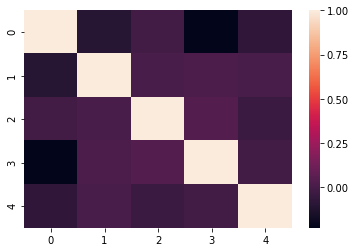

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

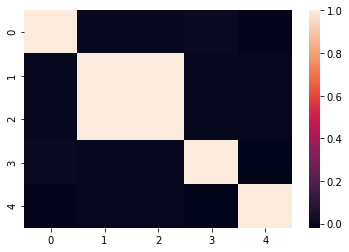

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .


In [51]:
sent_similarity(X_train_lsa,X_train)

sent_similarity(X_test_lsa,X_test)

## Drill 0: Test set

Now it's your turn: Apply our LSA model to the test set. Does it identify similar sentences for components 0 through 4?


~~So we sort of cheat to observe this result. We will simply reverse the test and the train at  the top of the code block.~~

~~Thus, with minimal effort (and 0 forward useability)~~ we can observe the result difference between our test and train sets.

So the above reversal does indeed give the same result, but I functionized all of this code above so it can be some what useable in the future. Now, you can simply call the functions over what ever Test Train split data you want and it'll give outputs if you change the parameters.

Future work is passing in kwargs.


### LSA Test model set
>0. Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1. " Oh !
2. " Oh no , no !
3. Such was Jane Fairfax ' s history .
4. " That has been a good deal the case , my dear ; but not to the degree you mention .



It appears that with in the test set sentence 1 and 2 are similar look at that! Oh! and Oh no no! are indeed similar and from different components.

## Drill 1: Tweaking tf-idf

Change things up a few times and see how that affects the results of the LSA. 

Try adding things like :

>* Lemmas
* Named Entities
* Or changing thresholds of exclusion / inclusion


Write up your observations and share them with your mentor.

In [61]:
X_train, X_test  = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.70, # drop words that occur in more than 70% the paragraphs
                             min_df=21, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True, #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                             ngram_range=(1,3)
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)

Number of features: 159


Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'present': 1.0}
Percent variance captured by all components: 95.91793918134421
Component 0:
" My dearest Emma ," said he , " for dearest you will always be , whatever the event of this hour ' s conversation , my dearest , most beloved Emma  tell me at once .    0.722590
Emma could not have desired a more spirited rejection of Mr . Martin ' s prose .                                                                                          0.709403
Emma was most agreeably surprized . Mr .                                                                                                                                  0.709403
At first it was downright dulness to Emma .                                                                                                                               0.672980
Name: 0, dtype: float64
Component 1:
" Oh !    0.995972
" Oh !    0.995972
" Oh !    0.9959

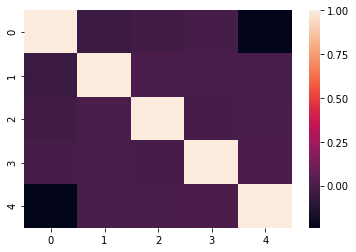

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

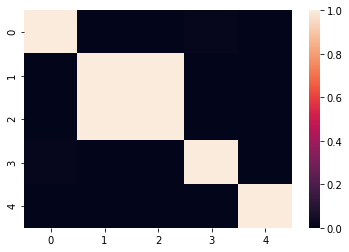

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .


In [62]:
#Train 
X_train_tfidf_csr = tfidf_csr(X_train_tfidf,X_train) ## TFIDF / CSR Call
X_train_lsa = dim_reduc(X_train_tfidf,X_train)#LSA Call
sent_similarity(X_train_lsa,X_train)#Sentence Similarity Call




# Test 
X_test_tfidf_csr = tfidf_csr(X_test_tfidf,X_test) ## TFIDF / CSR Call
X_test_lsa = dim_reduc(X_test_tfidf,X_test)#LSA Call
sent_similarity(X_test_lsa,X_test)#Sentence Similarity Call

### Lemma Reduction


In [59]:
nlp = spacy.load('en')

In [66]:
# Create lemmatizer using spacy
lemmatizer = spacy.lang.en.English()

def custom_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

In [67]:

X_train, X_test  = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.70, # drop words that occur in more than 70% the paragraphs
                             min_df=21, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True, #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                             ngram_range=(1,3),
                             tokenizer=custom_tokenizer
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)

c:\users\zdwhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Number of features: 299


Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minute': 0.6048822879659885, 'present': 0.6006097202605738, ', ,': 0.4179910133431656, ',': 0.314116052435879}
Percent variance captured by all components: 84.08586339444872
Component 0:
" I am very glad you did , and that you communicated it to me .                                                                   0.817020
" I see no probability in it , unless you have any better foundation than what you mention .                                      0.817020
" As to the circumstances of her birth , though in a legal sense she may be called Nobody , it will not hold in common sense .    0.783664
" Myself creating what I saw ,"                                                                                                   0.744929
Name: 0, dtype: float64
Component 1:
" Oh !"    0.697947
" Oh !"    0.697947
" Oh !"    0.697947
" Oh !"    0.697947
Name: 1, dtype: float64
Component 2:
O

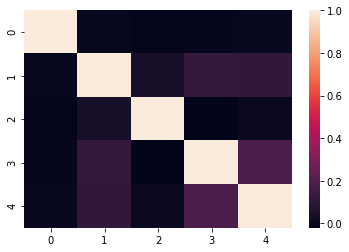

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

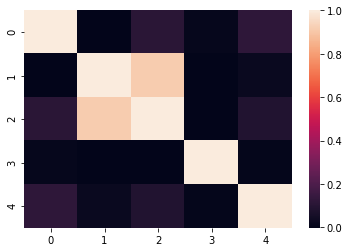

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .


In [68]:
#Train 
X_train_tfidf_csr = tfidf_csr(X_train_tfidf,X_train) ## TFIDF / CSR Call
X_train_lsa = dim_reduc(X_train_tfidf,X_train)#LSA Call
sent_similarity(X_train_lsa,X_train)#Sentence Similarity Call




# Test 
X_test_tfidf_csr = tfidf_csr(X_test_tfidf,X_test) ## TFIDF / CSR Call
X_test_lsa = dim_reduc(X_test_tfidf,X_test)#LSA Call
sent_similarity(X_test_lsa,X_test)#Sentence Similarity Call